# Project 3: Classification with Logistic Regression and SVM

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

**Your Answer:**   
Yujia Sun

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P3.ipynb**, then zip it and upload to Canvas

# Project Description

For this project we will apply both **Logistic Regression** and **SVM** to predict whether capacitors from a fabrication plant pass quality control based (QC) on two different tests. To train your system and determine its reliability you have a set of 118 examples. The plot of these examples is show below where a red x is a capacitor that failed QC and the green circles represent capacitors that passed QC.

<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P3_new.png" width="500"/>
</div>


## Data File

Two text files with the data is available on Canvas: a training set of 85 examples and a test set of 33 examples. Both are formatted as
- First line: **m** and **n**, tab separated
- Each line after that has two real numbers representing the results of the two tests, followed by a *1.0* if the capacitor *passed* QC and a *0.0* if it *failed* QC—tab separated.

You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.


In [1]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import numpy as np

train_data=np.loadtxt('P3train.txt', skiprows=1,delimiter='\t')
test_data=np.loadtxt('P3test.txt', skiprows=1,delimiter='\t')

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Your assignment is to use what you have learned from the class slides and homework to create (**from scratch in Python**, not by using Logistic Regression library function!) a **Logistic Regression** and **SVM** binary classifier to predict whether each capacitor in the test set will pass QC. 

## Logistic Regression

You are free to use any model variation and any testing or training approach we have discussed for logistic regression. In particular, since this data is not linear, I assume you will want to add new features based on power of the original two features to create a good decision boundary. $w_0 + w_1x_1 + w_2x_2$ is not going to work!
One choice might be
- $\textbf{w}^T \textbf{x} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 +w_6x_6 + w_7x_7 + w_8x_8$    where the new features are created as follows:

| New Features |From Original Features |
| --- | --- |
|$x_1$	| $x_1$|
|$x_2$	| $x_1^2$|
|$x_3$	| $x_2$||
|$x_4$	| $x_1x_2$|
|$x_5$	| $x_1x_2^2$|
|$x_6$	| $x_2^2$|
|$x_7$	| $x_1^2x_2$|
|$x_8$	| $x_1^2x_2^2$|

Note that it is easy to create a small Python program that reads in your  original features, uses a nested loop to create the new features and then writes them to a file:

```python
thePower = 2
for j in range(thePower+1): 
    for i in range(thePower+1):
        temp = (x1**i)*(x2**j)
        if (temp != 1):
            fout1.write(str(temp)+"\t") fout1.write(str(y)+"\n")
```

With a few additions to the code, you can make a program to create combinations of any powers of $x_1$ and $x_2$!

In [2]:
##############################################################################
#           TODO: Define the Logistic regression models                      #
##############################################################################
x_train = []
x1 = train_data[:,0]
x2 = train_data[:,1]

y_train = train_data[:,2]


thePower = 2
for j in range(thePower+1): 
    for i in range(thePower+1):
        temp = (x1**i)*(x2**j)
        x_train.append(temp)
        
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)
print(x_train.T[i])


##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

(9, 85)
[1.         0.13767    0.01895303 0.57529    0.07920017 0.01090349
 0.33095858 0.04556307 0.00627267]


## Optimization using Gradient Decent

Once you have defined the logistic regression model, you need to find the weights using the Gradient Decent algorithm. You need to implement the Vanilla Gradient Decent from scratch in Python.

You need to specify the hyperparameters of GD, and plot the training loss curve (**J-curve**). The loss function should be the binary cross-entropy loss function that we introduced.

In [3]:
##############################################################################
#           TODO: Implement the Gradient Decent Algorithm                    #
##############################################################################
# Define the hyperparameters:

# Numbers of epoch (epoch_num), learning rate (lr), and the initial weights(w)
epoch_num = 20000
lr = 0.1
w = np.random.rand(9)
J = []
loss = 0
train_accu = []
m = x_train.shape[1]

def hypothesis(w, x):
    H = 1/(1 + np.exp(-np.dot(x,w)))
    return H

# Define the loss:
def cross_entropy_loss(m, y_pred, y):
    J = -(1/m)*np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return J

# Calculate the gradient function:
def gradient_func(m, x, H, y):
    GD = (1/m)*np.dot(x, H-y)
    return GD

#Implement the Gradient decent algorithm using for loop
def Vanilla_GD(w, lr, GD):
    return w - lr*GD
    
for j in range(epoch_num):
    for i in range(m):
        y_pred = hypothesis(w, x_train.T[i])
        loss =  loss + cross_entropy_loss(m, y_pred, y_train[i])
        GD = gradient_func(m, x_train.T[i], y_pred, y_train[i])
        w = Vanilla_GD(w, lr, GD)
    J.append(loss/m)
    loss = 0
    train_pred = hypothesis(w, x_train.T)
    train_pred[train_pred>0.5] = 1
    train_pred[train_pred<0.5] = 0
    accu = np.sum(train_pred == y_train)/m
    train_accu.append(accu) 


##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, print out the final weights and plot the **J-curve/Loss curve** of training. 

The final weights are:
[  4.26105789   2.01779797 -10.08113282   3.28778287  -7.10194402
  -1.38239244  -9.16172399   1.66430384  -1.99614392]


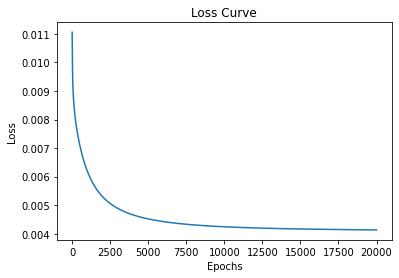

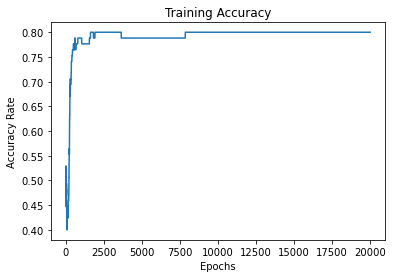

In [4]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
# Print out the final weights
print(f'The final weights are:\n{w}')

# Plot the J curve w.r.t. the iteration numbers
import matplotlib.pyplot as plt

epochs = list(range(len(J)))

plt.plot(epochs,J)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")

plt.show()

# Plot the Accuracy Rate
plt.plot(epochs,train_accu) 

plt.xlabel("Epochs")
plt.ylabel("Accuracy Rate")
plt.title("Training Accuracy")

plt.show()

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss how you can ensure that the model is well trained.

**Your Answer:**  

From the the "Loss Curve" it tells the model is well trained because the "loss" is getting smaller，when the epoch number reach 10000, the model get the best possible loss which is a value very close to zero. Also, the "Training Accucracy" plot above shows the accuracy rate for ths model is atleast above 80%. 

## Model Evaluation

Evaluate the performance on testing set:
- Print out the confusion matrix
- Calculate and print out the *accuracy*, *precision*, *recall*, and *F1* value of your model

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>


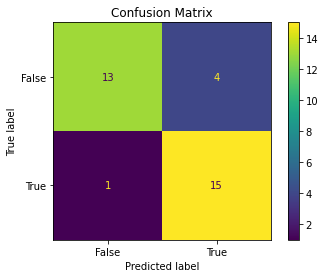

Test Accuracy = 85%
Precision = 79%
Recall = 94%
F1 score = 86%


In [5]:
##############################################################################
#                           TODO: Model Evaluation                           #
##############################################################################
#Print out the confusion matrix

#Test accucracy
x1_test = test_data[:,0]
x2_test = test_data[:,1]
x_test = []

thePower = 2
for j in range(thePower+1): 
    for i in range(thePower+1):
        temp = (x1_test**i)*(x2_test**j)
        x_test.append(temp)
        

x_test = np.array(x_test)
y_test = test_data[:,2]
y = hypothesis(w, x_test.T)

y[y>0.5] = 1
y[y<0.5] = 0
test_accu = np.sum(y==y_test)/y_test.size 

from sklearn import metrics

actual = y_test
predicted = y

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.title("Confusion Matrix")
plt.show()

#Calculate and print out the accuracy, precision, recall, and F1 value of your model

from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, sup = precision_recall_fscore_support(y_test, y, average='binary')

print(f'Test Accuracy = {test_accu * 100:.0f}%')
print(f'Precision = {precision * 100:.0f}%')
print(f'Recall = {recall * 100:.0f}%')
print(f'F1 score = {fscore * 100:.0f}%')

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Support Vector Machine (SVM)

In this part, you need to use the previous training and testing data file. 

You are **allowed** to use the svm functions in the **Scikit-learn** library and don’t need to implement the algorithm from scratch.

- You need to try at least **three** different kernel functions of SVM, and pick the **best** model.
- You need to print out the final weights got from your best SVM model.

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>

In [6]:
##############################################################################
#                      TODO: Classfication using SVM                         #
##############################################################################
# Pick the best model
from sklearn import svm

# C = np.arange(1, 30)
# train_accuracy_rbf = []
# train_accuracy_linear = []
# train_accuracy_poly = []

# test_accuracy_rbf = []
# test_accuracy_linear = []
# test_accuracy_poly = []


# best_test_accuracy = 0

# for para in C:
    
# kernel = 'rbf'
kernel = 'rbf'
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(x_train.T,y_train)
score_rbf = clf_rbf.score(x_test.T,y_test)
print("The score of rbf is : %f"%score_rbf)

# kernel = 'linear'
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(x_train.T,y_train)
score_linear = clf_linear.score(x_test.T,y_test)
print("The score of linear is : %f"%score_linear)

# kernel = 'poly'
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(x_train.T,y_train)
score_poly = clf_poly.score(x_test.T,y_test)
print("The score of poly is : %f"%score_poly)

# Print out the final weights

clf_best = svm.SVC(kernel='rbf')
train_accuracy_best = (clf_best.fit(x_train.T, y_train).score(x_train.T, y_train))

    
y_pred_best = clf_best.predict(x_test.T)
y_train_best = clf_best.predict(x_train.T)
test_accuracy_best = metrics.accuracy_score(y_test, y_pred_best)

w_rbf = clf_best.dual_coef_  

print(f'\nThe final weights of SVM model using the best model rbf are:\n{w}')
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

The score of rbf is : 0.909091
The score of linear is : 0.848485
The score of poly is : 0.787879

The final weights of SVM model using the best model rbf are:
[  4.26105789   2.01779797 -10.08113282   3.28778287  -7.10194402
  -1.38239244  -9.16172399   1.66430384  -1.99614392]


## Visualize Decision Boundary and Model Comparision

You need to plot the decision boundary of Logistic Regression and SVM that you previously trained separately. 

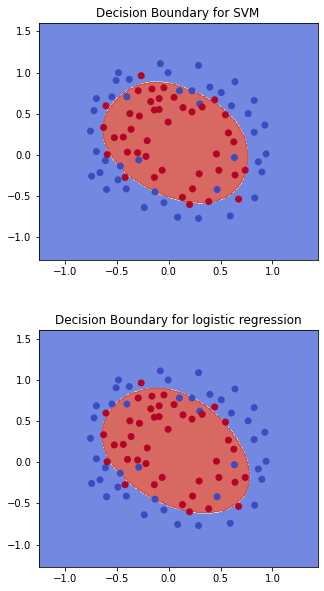

In [7]:
##############################################################################
#                   TODO: Plot the Decision Boundary                         #
##############################################################################
from matplotlib.colors import ListedColormap


x1_train_np = np.array(x1)
x2_train_np = np.array(x2)


x_min, x_max = x1_train_np.min() - .5, x1_train_np.max() + .5
y_min, y_max = x2_train_np.min() - .5, x2_train_np.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))


x_train_plot = []

for j in range(thePower+1): 
    for i in range(thePower+1):
        temp = (xx.ravel()**i)*(yy.ravel()**j)
        x_train_plot.append(temp)

x_train_plot = np.array(x_train_plot)

plt.figure(figsize=(5, 10))
plt.subplot(2, 1, 1)

Z = clf_best.predict(x_train_plot.T)
Z = Z.reshape(xx.shape)

plt.title('Decision Boundary for SVM')
svm_plot = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
svm_plot = plt.scatter(x1_train_np, x2_train_np, c=y_train, cmap=plt.cm.coolwarm)
plt.subplots_adjust(hspace=0.3)


plt.subplot(2, 1, 2)
Z1 = hypothesis(w, x_train_plot.T)

Z1[Z1>0.5] = 1
Z1[Z1<0.5] = 0
Z1 = Z1.reshape(xx.shape)
plt.title('Decision Boundary for logistic regression')
logis_plot = plt.contourf(xx, yy, Z1, cmap=plt.cm.coolwarm, alpha=0.8)
logis_plot = plt.scatter(x1_train_np, x2_train_np, c=y_train, cmap=plt.cm.coolwarm)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss which one has better performance and why.

**Your Answer:**  

The SVM has slightly better performance because its boundary is more clear than the Logistic Regression, so it better separate the data.